## Read Data from CSV and Calculate DQI

**Description**: Read data from a CSV file, identify errors as missing values, and calculate the DQI.

In [1]:
import pandas as pd

# Step 1: Load dataset (replace with your actual CSV file path)
try:
    df = pd.read_csv("your_data.csv")  # <-- replace this filename
except FileNotFoundError:
    # Create a sample DataFrame if file not found
    print("CSV not found, creating sample data instead...\n")
    df = pd.DataFrame({
        'ID': [1, 2, 3, 4, 5],
        'Name': ['Alice', 'Bob', None, 'David', 'Eve'],
        'Email': ['a@example.com', None, 'c@example.com', 'd@example.com', None],
        'Age': [25, 30, None, 22, 28]
    })

# Step 2: Display the dataset
print("=== Dataset ===")
print(df)

# Step 3: Calculate missing data
missing_values = df.isnull().sum().sum()
total_cells = df.shape[0] * df.shape[1]

# Step 4: Calculate DQI
dqi = ((total_cells - missing_values) / total_cells) * 100

# Step 5: Output
print("\n--- Data Quality Index Calculation ---")
print(f"Total Data Points: {total_cells}")
print(f"Missing Values: {missing_values}")
print(f"Data Quality Index (DQI): {dqi:.2f}%")

CSV not found, creating sample data instead...

=== Dataset ===
   ID   Name          Email   Age
0   1  Alice  a@example.com  25.0
1   2    Bob           None  30.0
2   3   None  c@example.com   NaN
3   4  David  d@example.com  22.0
4   5    Eve           None  28.0

--- Data Quality Index Calculation ---
Total Data Points: 20
Missing Values: 4
Data Quality Index (DQI): 80.00%


### Visualize Basic DQI with Bar Plot

**Description**: Create a bar plot for DQI and errors in a dataset.

File not found. Using sample data...



/tmp/ipykernel_23975/375127400.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='Metric', y='Value', data=plot_data, palette='viridis')


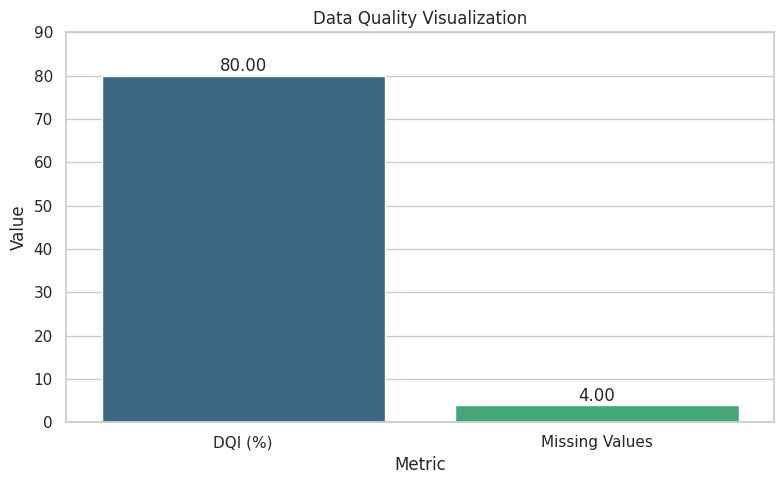

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load dataset (replace with your actual file)
try:
    df = pd.read_csv("your_data.csv")  # Replace with your actual CSV file
except FileNotFoundError:
    print("File not found. Using sample data...\n")
    # Sample fallback data
    df = pd.DataFrame({
        'ID': [1, 2, 3, 4, 5],
        'Name': ['Alice', 'Bob', None, 'David', 'Eve'],
        'Email': ['a@example.com', None, 'c@example.com', 'd@example.com', None],
        'Age': [25, 30, None, 22, 28]
    })

# Step 2: Calculate DQI
total_cells = df.size
missing_cells = df.isnull().sum().sum()
dqi = ((total_cells - missing_cells) / total_cells) * 100

# Step 3: Prepare data for visualization
plot_data = pd.DataFrame({
    'Metric': ['DQI (%)', 'Missing Values'],
    'Value': [dqi, missing_cells]
})

# Step 4: Bar Plot
sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))
barplot = sns.barplot(x='Metric', y='Value', data=plot_data, palette='viridis')

# Annotate bars
for index, row in plot_data.iterrows():
    plt.text(index, row['Value'] + 1, f"{row['Value']:.2f}", ha='center')

plt.title("Data Quality Visualization")
plt.ylim(0, max(plot_data['Value']) + 10)
plt.tight_layout()
plt.show()